In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,roc_curve,auc, confusion_matrix

In [42]:
df= pd.read_csv("/home/shree_xd/Documents/autism/autismdiagnosis/Autism_Prediction/dataset.csv")
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


# EDA

In [43]:
df.duplicated().sum()

0

In [44]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


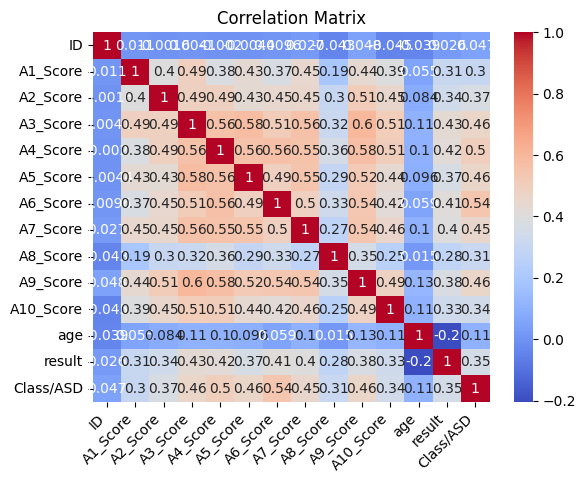

In [45]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha="right")  
plt.yticks(rotation=0)  

plt.show()


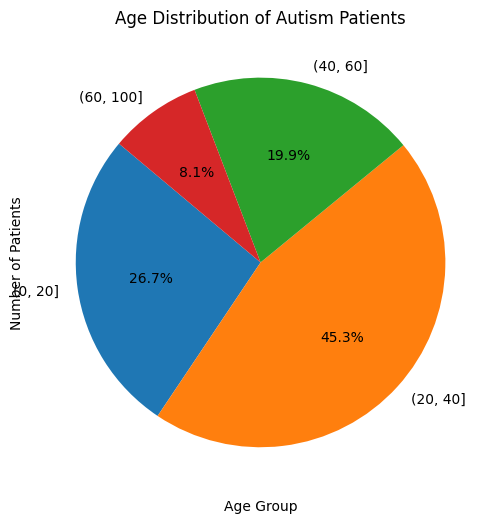

In [46]:
asd_patients = df[df['Class/ASD'] == 1]

age_groups = pd.cut(asd_patients['age'], bins=[0, 20, 40, 60, 100])  

age_group_counts = asd_patients['age'].groupby(age_groups).size()

plt.figure(figsize=(8, 6))  
age_group_counts.plot(kind='pie', autopct="%1.1f%%", startangle=140)  
plt.title("Age Distribution of Autism Patients")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")

plt.show()


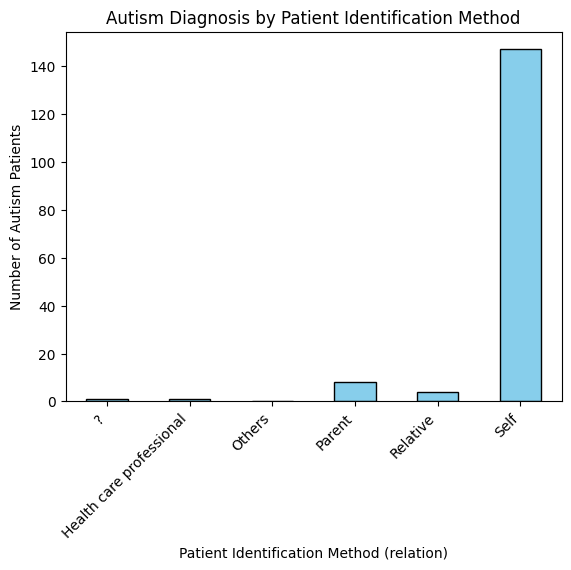

In [47]:
grouped_data = df.groupby(['relation', 'Class/ASD']).size().unstack(fill_value=0)
autism_cases = grouped_data[1]  
autism_cases.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Patient Identification Method (relation)")
plt.ylabel("Number of Autism Patients")
plt.title("Autism Diagnosis by Patient Identification Method")
plt.xticks(rotation=45, ha="right")

plt.show()

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'A1_Score'}>,
        <Axes: title={'center': 'A2_Score'}>,
        <Axes: title={'center': 'A3_Score'}>],
       [<Axes: title={'center': 'A4_Score'}>,
        <Axes: title={'center': 'A5_Score'}>,
        <Axes: title={'center': 'A6_Score'}>,
        <Axes: title={'center': 'A7_Score'}>],
       [<Axes: title={'center': 'A8_Score'}>,
        <Axes: title={'center': 'A9_Score'}>,
        <Axes: title={'center': 'A10_Score'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'result'}>,
        <Axes: title={'center': 'Class/ASD'}>, <Axes: >, <Axes: >]],
      dtype=object)

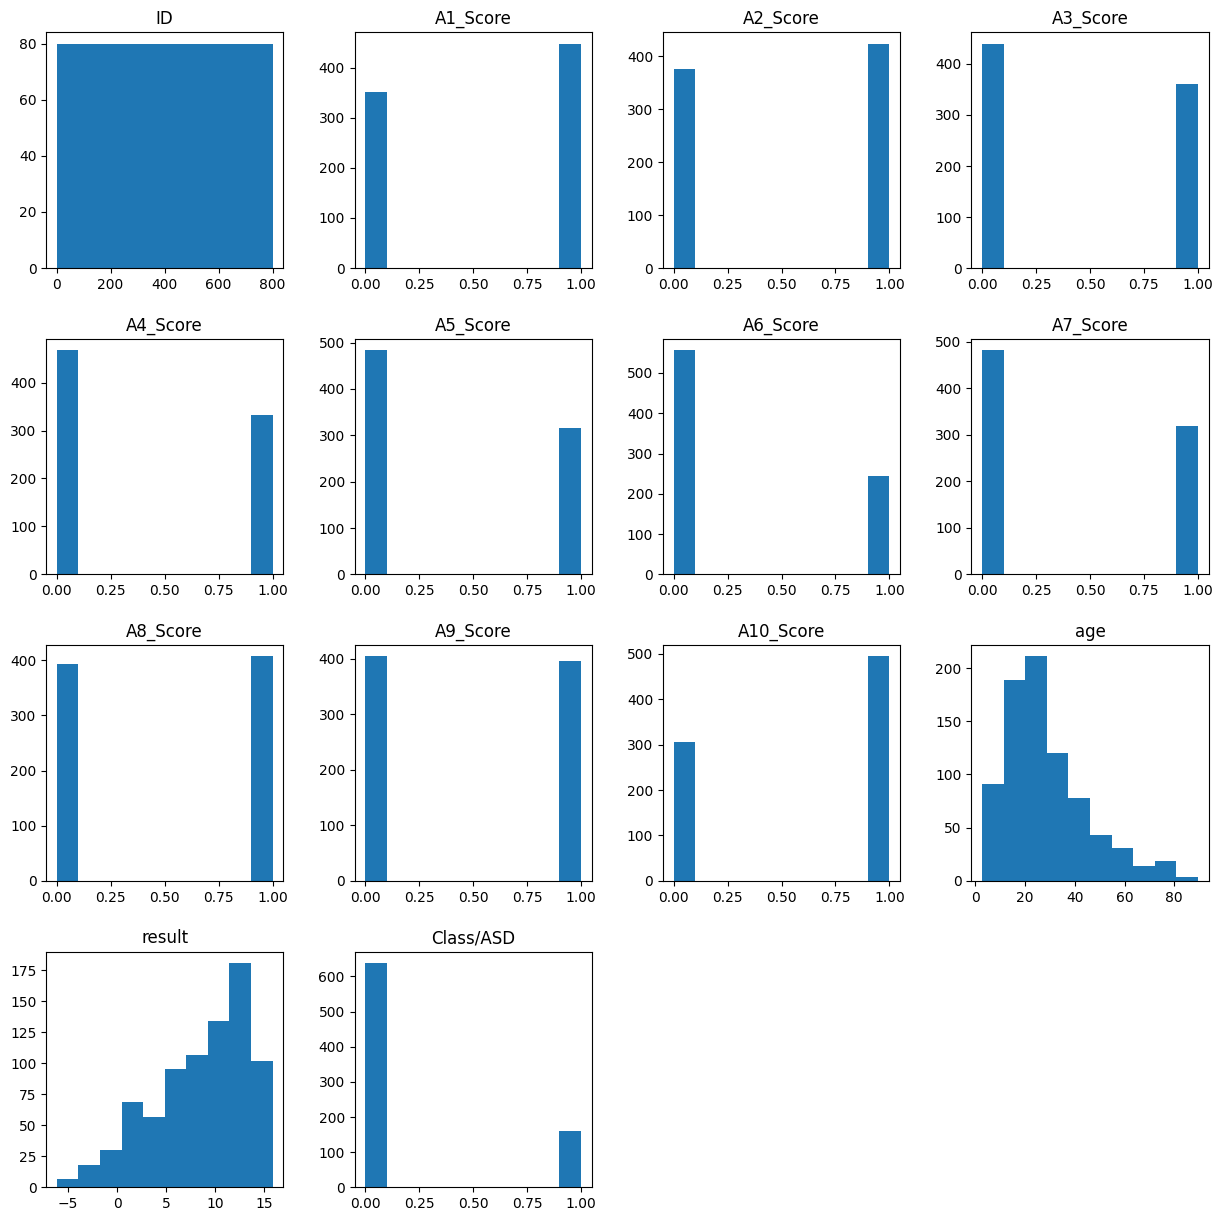

In [48]:
df.hist(figsize=(15, 15),grid=False)

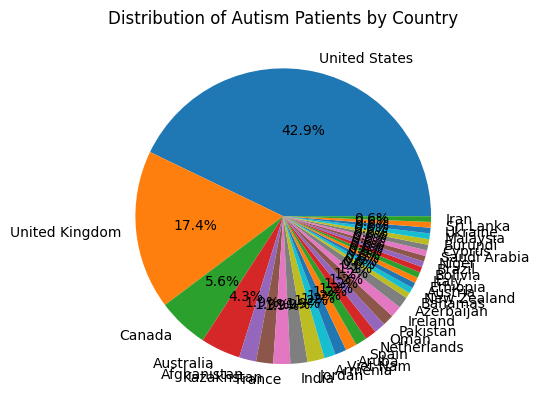

In [49]:
autism_patients = df[df['Class/ASD'] == 1]
country_counts = autism_patients['contry_of_res'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Autism Patients by Country")
plt.show()

In [50]:
unique_values=df['age_desc'].unique()
unique_values


array(['18 and more'], dtype=object)

# Preprocessing

In [51]:
df.isna().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [52]:
print("Non-Numerical Columns:")
print(df.select_dtypes(exclude=['int64', 'float64']).columns.tolist())


Non-Numerical Columns:
['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [53]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [54]:
gender_codes = np.where(df['gender'].str.lower() == "f", 1, 0)
df['gender'] = gender_codes

jaundice_codes = np.where(df['jaundice'].str.lower() == "yes", 1, 0)
df['jaundice'] = jaundice_codes

UAB_codes = np.where(df['used_app_before'].str.lower() == "yes", 1, 0)
df['used_app_before'] = UAB_codes

autism_codes = np.where(df['austim'].str.lower() == "yes", 1, 0)
df['austim'] = autism_codes
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,1,?,0,0,Austria,0,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,0,?,0,0,India,0,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,0,White-European,0,1,United States,0,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,1,?,0,0,United States,0,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,0,?,0,0,South Africa,0,-4.777286,18 and more,Self,0


In [55]:
columns_equal = (df['austim'] == df['Class/ASD']).all()

if columns_equal:
  print("Columns 'autism' and 'Class/ASD' have the same values.")
else:
  print("Columns 'autism' and 'Class/ASD' have different values.")


Columns 'autism' and 'Class/ASD' have different values.


In [56]:
unique_values = df['relation'].unique()
unique_values

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [57]:
relation_map = {
  "Parent": 1,
  "Relative": 2,
  "Others": 3,
  "Health care professional": 4,
  "?": 5,
  "Self": 6
}

def convert_relation(relation):
  return relation_map.get(relation)

df['relation'] = df['relation'].apply(convert_relation)
df.head()


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,1,?,0,0,Austria,0,6.351166,18 and more,6,0
1,2,0,0,0,0,0,0,0,0,0,...,0,?,0,0,India,0,2.255185,18 and more,6,0
2,3,1,1,1,1,1,1,1,1,1,...,0,White-European,0,1,United States,0,14.851484,18 and more,6,1
3,4,0,0,0,0,0,0,0,0,0,...,1,?,0,0,United States,0,2.276617,18 and more,6,0
4,5,0,0,0,0,0,0,0,0,0,...,0,?,0,0,South Africa,0,-4.777286,18 and more,6,0


In [58]:
del df['contry_of_res']
del df['ethnicity']
del df['age_desc']


In [59]:
print("Non-Numerical Columns:")
print(df.select_dtypes(exclude=['int64', 'float64']).columns.tolist())

Non-Numerical Columns:
[]


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)


# Training


## 1. SVM

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'poly', 'rbf'],  
    'gamma': ['scale', 'auto'],  
}

svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

best_params_svm = svm_grid_search.best_params_

best_svm_model = SVC(**best_params_svm)
best_svm_model.fit(X_train, y_train)

y_pred = best_svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


KeyboardInterrupt: 

## 2. Random Forest

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

rf_model = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

best_params_rf = rf_grid_search.best_params_

best_rf_model = RandomForestClassifier(**best_params_rf)
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

## 3. XGBoost

Accuracy: 0.8208333333333333
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       186
           1       0.62      0.54      0.57        54

    accuracy                           0.82       240
   macro avg       0.74      0.72      0.73       240
weighted avg       0.81      0.82      0.82       240



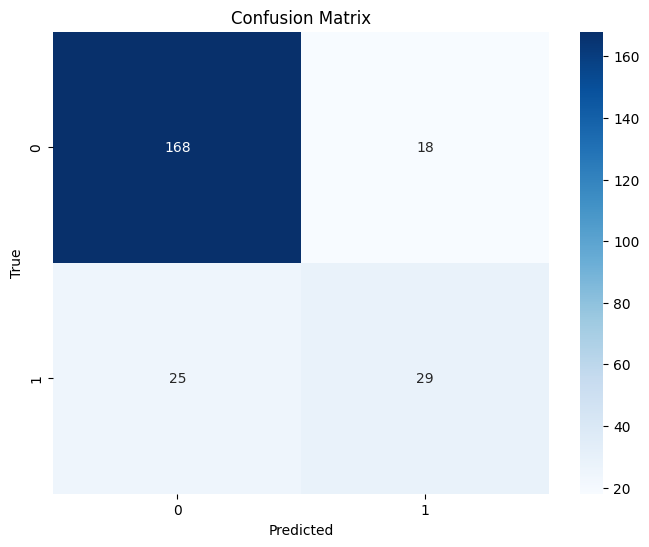

AUC (Area Under ROC Curve): 0.72


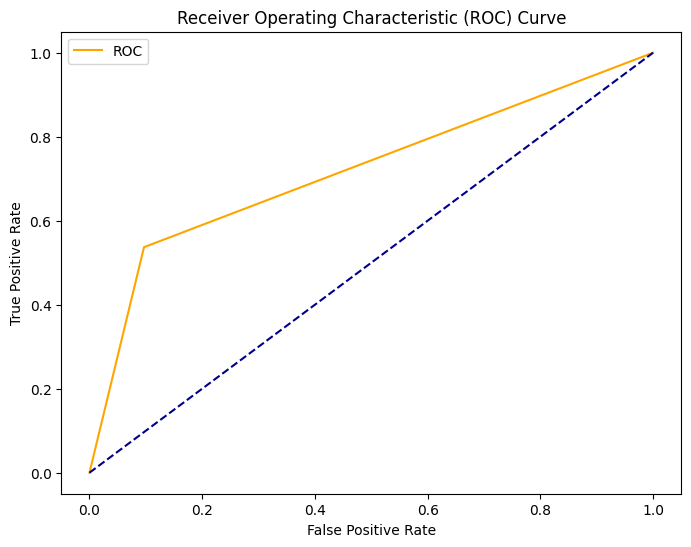

In [25]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC (Area Under ROC Curve): {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## 4. CNN

2024-04-14 21:26:54.327384: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-14 21:26:55.481326: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/10


/home/shree_xd/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7668 - loss: 0.7400 - val_accuracy: 0.5893 - val_loss: 0.6646
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7891 - loss: 0.5337 - val_accuracy: 0.7857 - val_loss: 0.5501
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7751 - loss: 0.5288 - val_accuracy: 0.7857 - val_loss: 0.5769
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7646 - loss: 0.6138 - val_accuracy: 0.7679 - val_loss: 0.4627
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8311 - loss: 0.4211 - val_accuracy: 0.7857 - val_loss: 0.3749
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8618 - loss: 0.3375 - val_accuracy: 0.7857 - val_loss: 0.5580
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8628 - loss: 0.3219 - val_accuracy: 0.8571 - val_loss: 0.3120
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8801 - loss: 0.2899 - val_accuracy: 0.8393 - val_loss: 0.3422
Ep

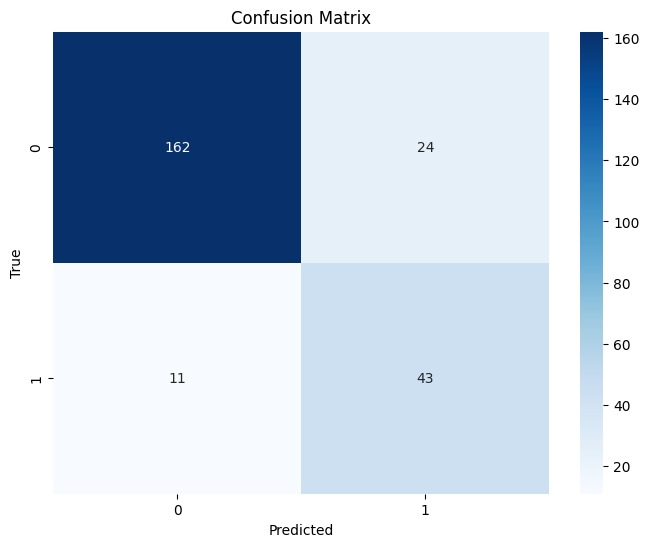

AUC (Area Under ROC Curve): 0.83


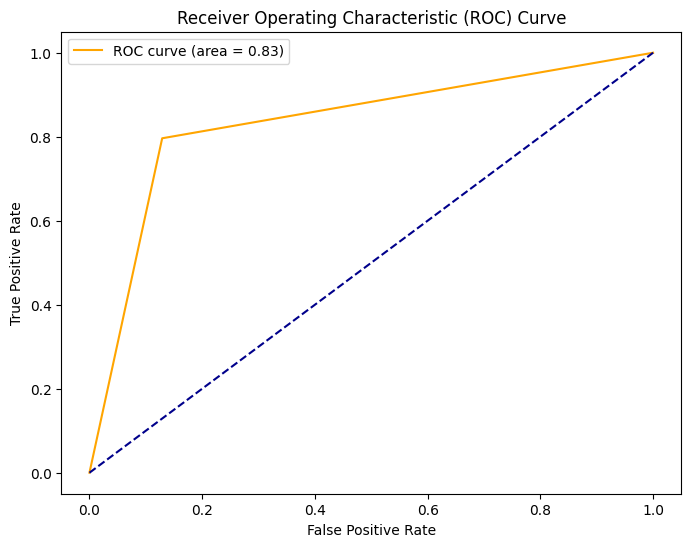

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop('Class/ASD', axis=1).values
y = df['Class/ASD'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC (Area Under ROC Curve): {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## 5. Greadient Boosting

Accuracy: 0.8291666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       186
           1       0.72      0.39      0.51        54

    accuracy                           0.83       240
   macro avg       0.78      0.67      0.70       240
weighted avg       0.82      0.83      0.81       240

Confusion Matrix:


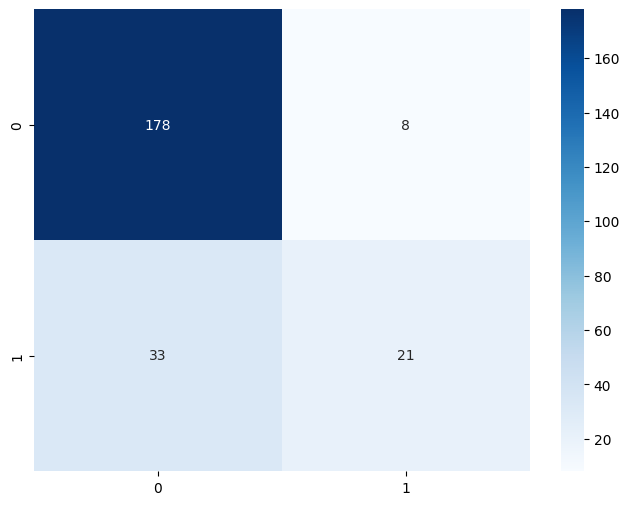

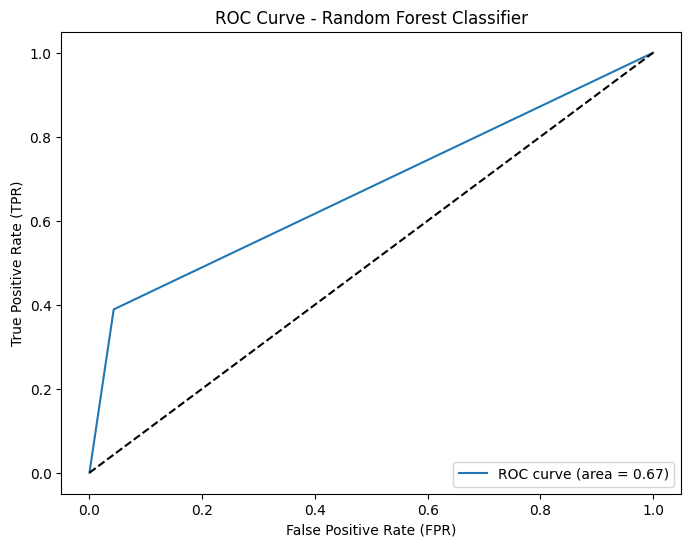

In [27]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('Class/ASD', axis=1).values
y = df['Class/ASD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

model = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 6, 9], 
    'learning_rate': [0.1, 0.01, 0.001],  
    'subsample': [0.8, 0.9, 1.0],  
    'colsample_bytree': [0.8, 0.9, 1.0],  
}

gb_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

best_params_gb = gb_grid_search.best_params_

best_gb_model = xgb.XGBClassifier(**best_params_gb)
best_gb_model.fit(X_train, y_train)

y_pred = best_gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random Guess Line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


## 7. optimization 

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
pca = PCA()
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
])

models = [
    ('SVM', SVC()),
    ('RandomForest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('MLP', MLPClassifier())
]

param_grids = {
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]},
    'KNN': {'n_neighbors': [3, 5, 10]},
    'MLP': {'hidden_layer_sizes': [(64,), (128,), (256,)], 'alpha': [0.0001, 0.001, 0.01]}
}

best_models_grid = {}
for name, model in models:
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models_grid[name] = grid_search.best_estimator_

best_models_random = {}
for name, model in models:
    random_search = RandomizedSearchCV(model, param_grids[name], n_iter=5, cv=5, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_models_random[name] = random_search.best_estimator_

print("Models with Grid Search:")
for name, model in best_models_grid.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy}")

print("\nModels with Randomized Search:")
for name, model in best_models_random.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy}")


/home/shree_xd/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Models with Grid Search:
SVM: 0.9888888888888889
RandomForest: 0.975
KNN: 0.9833333333333333
MLP: 0.9777777777777777

Models with Randomized Search:
SVM: 0.9888888888888889
RandomForest: 0.975
KNN: 0.9833333333333333
MLP: 0.9833333333333333
